In [1]:
pip install folium

In [2]:
import folium
import pandas as pd
import numpy

In [3]:
중구_위치=pd.read_csv("./중구 위치.csv",encoding='cp949')
중구_위치=중구_위치.drop(['Unnamed: 4'],1)
중구_위치

,대여소번호,대여소명,위도,경도
0,310,청계광장 옆,37.568878,126.977470
1,312,시청역 1번출구 뒤,37.564674,126.976738
2,318,광교사거리 남측,37.568527,126.982552
3,320,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...
82,4793,동대문역사문화공원역 5번출구,37.564308,127.006477
83,4794,서울역 서부교차로(3),37.555408,126.969421
84,4796,부산은행,37.566471,126.979256
85,4797,KG타워 앞,37.563396,126.968941


In [4]:
ID=중구_위치['대여소번호']
중구_위도=중구_위치['위도']
중구_경도=중구_위치['경도']
위도=중구_위도.mean()
경도=중구_경도.mean()

In [8]:
m = folium.Map([위도, 경도], zoom_start = 13)

In [9]:
coords = []
for i in range(len(중구_위치)-1):
    x = 중구_위도[i]
    y = 중구_경도[i]
    coords.append([x, y])
    for i in range(len(coords)):
        folium.Circle(
        location = coords[i],
        radius = 13,
        color = 'red').add_to(m)

In [10]:
m

In [8]:
대여반납이력=pd.read_csv("./공공자전거 대여이력 정보_2021.06.csv", encoding='cp949')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
대여반납이력=대여반납이력.drop(['자전거번호','대여 대여소명','대여거치대','반납대여소명','이용시간','이용거리','반납거치대'],1)

In [10]:
대여반납이력

,대여일시,대여 대여소번호,반납일시,반납대여소번호
0,2021-05-31 23:07:00,3571,2021-06-01 00:00:00,3538
1,2021-05-31 23:37:19,1911,2021-06-01 00:00:02,1843
2,2021-05-31 23:48:40,3860,2021-06-01 00:00:03,3586
3,2021-05-31 23:47:52,2222,2021-06-01 00:00:05,2228
4,2021-05-31 23:51:14,1955,2021-06-01 00:00:08,1856
...,...,...,...,...
3445939,2021-06-30 22:44:14,152,2021-07-01 04:48:33,126
3445940,2021-06-30 22:45:19,152,2021-07-01 04:52:25,437
3445941,2021-06-30 22:43:43,152,2021-07-01 04:52:27,437
3445942,2021-06-30 22:11:14,2220,2021-07-01 04:55:29,2526


In [11]:
대여반납이력['반납대여소번호'] = 대여반납이력['반납대여소번호'].astype(str)
대여반납이력['대여 대여소번호'] = 대여반납이력['대여 대여소번호'].astype(str)

In [12]:
대여반납이력 = 대여반납이력[대여반납이력['반납대여소번호'].apply(lambda x: x.isnumeric())]
대여반납이력 = 대여반납이력[대여반납이력['대여 대여소번호'].apply(lambda x: x.isnumeric())]

In [13]:
대여반납이력['반납대여소번호'] = 대여반납이력['반납대여소번호'].astype('int')
대여반납이력['대여 대여소번호'] = 대여반납이력['대여 대여소번호'].astype('int')

# 구별대여소번호

In [14]:
구별대여소번호=pd.read_csv("./station_구별.csv", encoding='cp949')

In [15]:
구별대여소번호

,Unnamed: 0,대여소번호,소재지.위치.
0,5,102,마포구
1,6,103,마포구
2,7,104,마포구
3,8,105,마포구
4,9,106,마포구
...,...,...,...
2462,2467,4864,송파구
2463,2468,4865,송파구
2464,2469,4867,송파구
2465,2470,4868,송파구


In [16]:
구별대여소번호_중구=구별대여소번호[구별대여소번호['소재지.위치.']=='중구'];구별대여소번호_중구

,Unnamed: 0,대여소번호,소재지.위치.
178,183,300,중구
188,193,310,중구
189,194,312,중구
192,197,318,중구
193,198,320,중구
...,...,...,...
2435,2440,4792,중구
2436,2441,4793,중구
2437,2442,4794,중구
2438,2443,4796,중구


# 대여이력

In [17]:
대여이력=대여반납이력.drop(['반납대여소번호','반납일시'],1)

In [18]:
대여이력

,대여일시,대여 대여소번호
0,2021-05-31 23:07:00,3571
1,2021-05-31 23:37:19,1911
2,2021-05-31 23:48:40,3860
3,2021-05-31 23:47:52,2222
4,2021-05-31 23:51:14,1955
...,...,...
3445939,2021-06-30 22:44:14,152
3445940,2021-06-30 22:45:19,152
3445941,2021-06-30 22:43:43,152
3445942,2021-06-30 22:11:14,2220


In [19]:
대여이력=대여이력.rename(columns={'대여 대여소번호':'대여소번호'})
대여이력_자치구=대여이력.merge(구별대여소번호,on=['대여소번호'],how='inner')
대여이력_자치구=대여이력_자치구.rename(columns={'소재지.위치.':'자치구'})

# 대여이력_중구

In [20]:
대여이력_중구=대여이력_자치구[대여이력_자치구['자치구']=='중구']

In [21]:
대여이력_중구=대여이력_중구.drop(['Unnamed: 0'],1)

In [22]:
len(대여이력_중구['대여소번호'].unique())

86

In [23]:
대여이력_중구['대여일시']= pd.to_datetime(대여이력_중구['대여일시'])

In [24]:
# 2021-06-30 / 시간대 2 만 뽑아내기

대여이력_중구['대여일시_hour']=대여이력_중구['대여일시'].dt.hour
대여이력_중구['대여일시_date']=대여이력_중구['대여일시'].dt.date

In [25]:
대여이력_중구['대여일시_date']

99574      2021-05-31
99575      2021-05-31
99576      2021-05-31
99577      2021-06-01
99578      2021-06-01
              ...    
3427237    2021-06-30
3427238    2021-06-30
3427239    2021-06-30
3427240    2021-06-30
3427241    2021-06-30
Name: 대여일시_date, Length: 80956, dtype: object

In [26]:
대여이력_중구['대여일시_date']=대여이력_중구['대여일시_date'].astype(str)

In [27]:
대여이력_중구=대여이력_중구[대여이력_중구['대여일시_date']=='2021-06-30']

In [28]:
대여이력_중구

,대여일시,대여소번호,자치구,대여일시_hour,대여일시_date
100236,2021-06-30 01:34:32,382,중구,1,2021-06-30
100237,2021-06-30 01:50:49,382,중구,1,2021-06-30
100238,2021-06-30 02:09:38,382,중구,2,2021-06-30
100239,2021-06-30 03:58:31,382,중구,3,2021-06-30
100240,2021-06-30 04:16:26,382,중구,4,2021-06-30
...,...,...,...,...,...
3427237,2021-06-30 07:11:58,4777,중구,7,2021-06-30
3427238,2021-06-30 07:26:03,4777,중구,7,2021-06-30
3427239,2021-06-30 18:32:14,4777,중구,18,2021-06-30
3427240,2021-06-30 20:28:21,4777,중구,20,2021-06-30


In [29]:
대여이력_중구=대여이력_중구[(대여이력_중구['대여일시_hour']>= 4) & (대여이력_중구['대여일시_hour'] < 10)]

In [30]:
len(대여이력_중구['대여소번호'].unique())

77

In [31]:
grouped = 대여이력_중구.groupby(['대여소번호','대여일시_date'])
grouped_대여=pd.DataFrame(grouped.count())

In [32]:
grouped_대여

,,대여일시,자치구,대여일시_hour
대여소번호,대여일시_date,,,
300,2021-06-30,17,17,17
310,2021-06-30,8,8,8
318,2021-06-30,8,8,8
320,2021-06-30,10,10,10
321,2021-06-30,8,8,8
...,...,...,...,...
4792,2021-06-30,7,7,7
4793,2021-06-30,5,5,5
4794,2021-06-30,6,6,6


In [33]:
grouped_대여=grouped_대여.drop(['자치구','대여일시_hour'],1)
grouped_대여=grouped_대여.rename(columns={'대여일시':'대여수'})

# 반납이력

In [34]:
반납이력=대여반납이력.drop(['대여 대여소번호','대여일시'],1)

In [35]:
반납이력

,반납일시,반납대여소번호
0,2021-06-01 00:00:00,3538
1,2021-06-01 00:00:02,1843
2,2021-06-01 00:00:03,3586
3,2021-06-01 00:00:05,2228
4,2021-06-01 00:00:08,1856
...,...,...
3445939,2021-07-01 04:48:33,126
3445940,2021-07-01 04:52:25,437
3445941,2021-07-01 04:52:27,437
3445942,2021-07-01 04:55:29,2526


In [36]:
반납이력=반납이력.rename(columns={'반납대여소번호':'대여소번호'})
반납이력_자치구=반납이력.merge(구별대여소번호,on=['대여소번호'],how='inner')
반납이력_자치구=반납이력_자치구.rename(columns={'소재지.위치.':'자치구'})

In [37]:
반납이력_중구=반납이력_자치구[반납이력_자치구['자치구']=='중구']

In [38]:
반납이력_중구=반납이력_중구.drop(['Unnamed: 0'],1)

In [39]:
len(반납이력_중구['대여소번호'].unique())

86

In [40]:
반납이력_중구['반납일시']= pd.to_datetime(반납이력_중구['반납일시'])

In [41]:
# 2021-06-30 / 시간대 2 만 뽑아내기

반납이력_중구['반납일시_hour']=반납이력_중구['반납일시'].dt.hour
반납이력_중구['반납일시_date']=반납이력_중구['반납일시'].dt.date

In [42]:
반납이력_중구['반납일시_date']=반납이력_중구['반납일시_date'].astype(str)

In [43]:
반납이력_중구=반납이력_중구[반납이력_중구['반납일시_date']=='2021-06-30']

In [44]:
반납이력_중구=반납이력_중구[(반납이력_중구['반납일시_hour']>= 4) & (반납이력_중구['반납일시_hour'] < 10)]

In [45]:
반납이력_중구['반납일시_hour'].unique()

array([4, 5, 6, 7, 8, 9], dtype=int64)

In [46]:
len(반납이력_중구['대여소번호'].unique())

76

In [47]:
반납이력_중구

,반납일시,대여소번호,자치구,반납일시_hour,반납일시_date
313106,2021-06-30 04:05:41,378,중구,4,2021-06-30
313107,2021-06-30 05:29:39,378,중구,5,2021-06-30
313108,2021-06-30 05:39:45,378,중구,5,2021-06-30
313109,2021-06-30 05:57:57,378,중구,5,2021-06-30
313110,2021-06-30 06:27:41,378,중구,6,2021-06-30
...,...,...,...,...,...
3426958,2021-06-30 08:33:56,4797,중구,8,2021-06-30
3426959,2021-06-30 09:05:30,4797,중구,9,2021-06-30
3426960,2021-06-30 09:07:34,4797,중구,9,2021-06-30
3426961,2021-06-30 09:12:11,4797,중구,9,2021-06-30


In [48]:
grouped1 = 반납이력_중구.groupby(['대여소번호','반납일시_date'])
grouped_반납=pd.DataFrame(grouped1.count())

In [49]:
grouped_반납

,,반납일시,자치구,반납일시_hour
대여소번호,반납일시_date,,,
300,2021-06-30,30,30,30
310,2021-06-30,20,20,20
318,2021-06-30,16,16,16
320,2021-06-30,28,28,28
321,2021-06-30,11,11,11
...,...,...,...,...
4792,2021-06-30,6,6,6
4793,2021-06-30,11,11,11
4794,2021-06-30,3,3,3


In [50]:
grouped_반납=grouped_반납.drop(['자치구','반납일시_hour'],1)
grouped_반납=grouped_반납.rename(columns={'반납일시':'반납수'})

In [51]:
grouped_반납

,,반납수
대여소번호,반납일시_date,
300,2021-06-30,30
310,2021-06-30,20
318,2021-06-30,16
320,2021-06-30,28
321,2021-06-30,11
...,...,...
4792,2021-06-30,6
4793,2021-06-30,11
4794,2021-06-30,3


In [52]:
grouped_대여반납=grouped_대여.merge(grouped_반납,on=['대여소번호'],how='inner');grouped_대여반납

,대여수,반납수
대여소번호,,
300,17,30
310,8,20
318,8,16
320,10,28
321,8,11
...,...,...
4792,7,6
4793,5,11
4794,6,3


## grouped_대여반납 (중구/2021-06-30/시간대(4~10)/대여반납수)

In [53]:
grouped_대여반납

,대여수,반납수
대여소번호,,
300,17,30
310,8,20
318,8,16
320,10,28
321,8,11
...,...,...
4792,7,6
4793,5,11
4794,6,3


In [54]:
중구_위치

,대여소번호,대여소명,위도,경도
0,310,청계광장 옆,37.568878,126.977470
1,312,시청역 1번출구 뒤,37.564674,126.976738
2,318,광교사거리 남측,37.568527,126.982552
3,320,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...
82,4793,동대문역사문화공원역 5번출구,37.564308,127.006477
83,4794,서울역 서부교차로(3),37.555408,126.969421
84,4796,부산은행,37.566471,126.979256
85,4797,KG타워 앞,37.563396,126.968941


In [55]:
중구대여반납=grouped_대여반납.merge(중구_위치,on=['대여소번호'],how='inner')

# 중구대여반납

In [56]:
중구대여반납

,대여소번호,대여수,반납수,대여소명,위도,경도
0,300,17,30,정동사거리,37.568050,126.969231
1,310,8,20,청계광장 옆,37.568878,126.977470
2,318,8,16,광교사거리 남측,37.568527,126.982552
3,320,10,28,을지로입구역 4번출구 앞,37.566223,126.983589
4,321,8,11,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139
...,...,...,...,...,...,...
67,4792,7,6,퇴계로4가 교차로(중구청),37.562527,126.998314
68,4793,5,11,동대문역사문화공원역 5번출구,37.564308,127.006477
69,4794,6,3,서울역 서부교차로(3),37.555408,126.969421
70,4796,14,30,부산은행,37.566471,126.979256


In [57]:
거치대데이터=pd.read_csv('./API_data.csv')

In [58]:
거치대데이터=거치대데이터[['stationName','stationId','rackTotCnt','stationLatitude','stationLongitude']]

In [59]:
거치대데이터

,stationName,stationId,rackTotCnt,stationLatitude,stationLongitude
0,102. 망원역 1번출구 앞,ST-4,22,37.555649,126.910629
16,3612. 은곡마을,ST-2677,10,37.467262,127.098015
15,3611. 방죽마을 입구,ST-2676,16,37.471233,127.107216
14,3610. 윗반마을 입구,ST-2675,10,37.465347,127.108803
13,3609. 언주초등학교 입구,ST-2674,10,37.485367,127.038498
...,...,...,...,...,...
339,1956. 도야미리숯불갈비 앞,ST-1218,12,37.510010,126.882050
340,1957. 구일고등학교 정문,ST-1219,17,37.493401,126.874329
341,1958. 강서수도사업소민원센터,ST-1220,12,37.495781,126.890121
328,1931. 개봉역(북측광장),ST-920,12,37.494995,126.858253


In [60]:
거치대데이터_중복제거=거치대데이터.drop_duplicates()

In [61]:
거치대데이터_중복제거=거치대데이터_중복제거.rename(columns={'stationLatitude':'위도','stationLongitude':"경도",'rackTotCnt':'거치대수'})

In [62]:
거치대데이터_중복제거['stationName']=거치대데이터_중복제거['stationName'].astype(str)

In [63]:
거치대데이터_중복제거['대여소번호']=거치대데이터_중복제거.stationName.str.split('.').str[0]

In [64]:
거치대데이터_중복제거=거치대데이터_중복제거[['대여소번호','거치대수']]

In [65]:
거치대데이터_중복제거['대여소번호']=거치대데이터_중복제거['대여소번호'].astype(int)

In [66]:
중구대여반납_거치대=중구대여반납.merge(거치대데이터_중복제거,on=['대여소번호'],how='inner')

In [67]:
중구대여반납_거치대

,대여소번호,대여수,반납수,대여소명,위도,경도,거치대수
0,300,17,30,정동사거리,37.568050,126.969231,9
1,310,8,20,청계광장 옆,37.568878,126.977470,8
2,318,8,16,광교사거리 남측,37.568527,126.982552,12
3,320,10,28,을지로입구역 4번출구 앞,37.566223,126.983589,17
4,321,8,11,KEB 하나금융그룹 명동사옥 옆,37.565464,126.984139,17
...,...,...,...,...,...,...,...
64,4792,7,6,퇴계로4가 교차로(중구청),37.562527,126.998314,10
65,4793,5,11,동대문역사문화공원역 5번출구,37.564308,127.006477,10
66,4794,6,3,서울역 서부교차로(3),37.555408,126.969421,10
67,4796,14,30,부산은행,37.566471,126.979256,10


In [68]:
중구대여반납_거치대['(반납-대여)/거치대수']=(중구대여반납_거치대['반납수']-중구대여반납_거치대['대여수'])/중구대여반납_거치대['거치대수']

In [69]:
중구대여반납_거치대=중구대여반납_거치대[['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','위도','경도']]

In [70]:
중구대여반납_거치대

,대여소번호,대여수,반납수,거치대수,(반납-대여)/거치대수,위도,경도
0,300,17,30,9,1.444444,37.568050,126.969231
1,310,8,20,8,1.500000,37.568878,126.977470
2,318,8,16,12,0.666667,37.568527,126.982552
3,320,10,28,17,1.058824,37.566223,126.983589
4,321,8,11,17,0.176471,37.565464,126.984139
...,...,...,...,...,...,...,...
64,4792,7,6,10,-0.100000,37.562527,126.998314
65,4793,5,11,10,0.600000,37.564308,127.006477
66,4794,6,3,10,-0.300000,37.555408,126.969421
67,4796,14,30,10,1.600000,37.566471,126.979256


In [71]:
import matplotlib.pyplot as plt

(array([ 2.,  2.,  3.,  3., 32.,  8.,  8.,  5.,  5.,  1.]),
 array([-1.57142857, -1.21428571, -0.85714286, -0.5       , -0.14285714,
         0.21428571,  0.57142857,  0.92857143,  1.28571429,  1.64285714,
         2.        ]),
 <BarContainer object of 10 artists>)

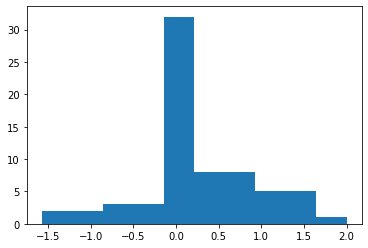

In [72]:
plt.hist(중구대여반납_거치대['(반납-대여)/거치대수'])

# 대여소별 자전거수 적정/많음/적음으로 분류
#### (반납-대여)/거치대수가 [-0.14285714, 0.21428571]인 값 : 적정
#### (반납-대여)/거치대수가 [ 0.21428571, ]인 값 : 많음
#### (반납-대여)/거치대수가 [, -0.14285714]인 값 : 적음

In [119]:
def get_group(v):
    if v < -0.14285714:
        group = '적음'
    elif v < 0.21428571:
        group = '많음'
    else:
        group = '적정'
    return group

In [120]:
중구대여반납_거치대['group'] = 중구대여반납_거치대['(반납-대여)/거치대수'].apply(lambda v: get_group(v))
중구대여반납_거치대

,대여소번호,대여수,반납수,거치대수,(반납-대여)/거치대수,위도,경도,group
0,300,17,30,9,1.444444,37.568050,126.969231,적정
1,310,8,20,8,1.500000,37.568878,126.977470,적정
2,318,8,16,12,0.666667,37.568527,126.982552,적정
3,320,10,28,17,1.058824,37.566223,126.983589,적정
4,321,8,11,17,0.176471,37.565464,126.984139,많음
...,...,...,...,...,...,...,...,...
64,4792,7,6,10,-0.100000,37.562527,126.998314,많음
65,4793,5,11,10,0.600000,37.564308,127.006477,적정
66,4794,6,3,10,-0.300000,37.555408,126.969421,적음
67,4796,14,30,10,1.600000,37.566471,126.979256,적정


In [122]:
중구대여반납_거치대.to_csv("./중구대여반납_거치대_group.csv",index_label=False,encoding='utf-8')

In [123]:
pd.read_csv("./중구대여반납_거치대_group.csv")

,대여소번호,대여수,반납수,거치대수,(반납-대여)/거치대수,위도,경도,group
0,300,17,30,9,1.444444,37.568050,126.969231,적정
1,310,8,20,8,1.500000,37.568878,126.977470,적정
2,318,8,16,12,0.666667,37.568527,126.982552,적정
3,320,10,28,17,1.058824,37.566223,126.983589,적정
4,321,8,11,17,0.176471,37.565464,126.984139,많음
...,...,...,...,...,...,...,...,...
64,4792,7,6,10,-0.100000,37.562527,126.998314,많음
65,4793,5,11,10,0.600000,37.564308,127.006477,적정
66,4794,6,3,10,-0.300000,37.555408,126.969421,적음
67,4796,14,30,10,1.600000,37.566471,126.979256,적정
